<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**
**Entrada**: Un conjunto de n numeros $[a_1,a_2,...,a_n]$.

**Salida**: Secuencia ordenada de la entrada $[a_1',a_2',...,a_n']$ de forma que quede cada numero al momento de su salida sea menor al anterior $a_1'\leq a_2' \leq... \leq a_n'$. 

El algoritmo BucketSort es un metodo de ordenamiento donde mediante el uso de divide y venceras realiza el ordenamiento de una secuencia de numeros, retornando dicha secuencia ordenada de menor a mayor.

Este tipo de algoritmos puede ser utilizado tanto para valores nuemricos como valores punto flotante, teniendo una semejanza con el agloritmo MergeSort debido a su uso de separacion de cada bucket para las operaciones de ordenamiento.

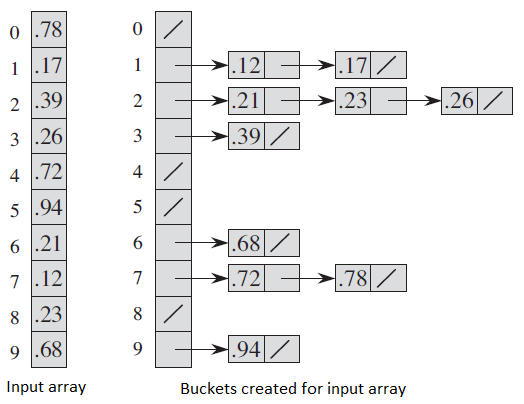

# 2.Algoritmo
El siguiente codigo muestra la implementacion en codigo del metodo de ordenamiento **BucketSort**.


In [1]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import statistics as st

In [100]:
def insertionSort(b, verbose):
    for i in range(1, len(b)):
        actual = b[i] #Numero actual con el que se comparara.
        j = i - 1
        if verbose:
          if b[j] > actual:
            print("Debido a que ",colored(f"{str(b[j])}","green"), ">",colored(f"{str(b[i])}","green"))
            print("Se realiza un cambio en el orden del bucket")
          else:
            print("Debido a que ", colored(f"{str(b[j])}","green"), "<", colored(f"{str(b[i])}","green"))
            print("No se realiza un cambio en el orden del bucket")

        while j >= 0 and b[j] > actual: #Se realiza la comparacion para saber si este debe o no realizar un cambio.
            b[j + 1] = b[j] #En caso de ser asi realiza el cambio de posicion.
            j -= 1

        b[j + 1] = actual
        if verbose:
          if b[j] > actual:
            print("Nuevo orden bucket", colored(f"{str(b[:])}","red"))
            print("")
          else:
            print("Orden Actual", colored(f"{str(b[:])}","red"))
            print("") 

    #Retorna el arreglo ordenado de menor a mayor.
    return b 

In [101]:
#Algoritmo BucketSort
def BucketSort(a, verbose = False):
  aux = []
  largo = len(a)
  if verbose:
    print("Arreglo de entrada",colored(f"{str(a[:])}","blue"))
    print('Implementacion BucketSort')
    print('')

  for i in range (0, largo): #Se genera el arreglo vacio
    aux.append([])
  if verbose:
    print("Creando un  arreglo donde se ingresen los numeros segun el 0.n")
  for j in a: #Se ingresan los numeros a sus posiciones correspondientes.
    if verbose:
     print("Numero:", j)
    variable = int(largo * j)

    aux[variable].append(j)

    if verbose:
      print("Ingresado en la poscion:", variable, "Numero/s en dicha posicion", colored(f"{str(aux[variable])}","yellow"))
      print('')

  if verbose:
    print("Dejando un arreglo auxiliar de la siguiente forma:", colored(f"{str(aux[:])}","blue"))
    print('')

  if verbose:
    print('Implementacion InsertionSort')
    print("Para los bucket de largo 1 no se realizan comparaciones para el ordenamiento")
    print("")

  for z in range (largo):#Por medio de la utilizacion del InsertionSort ordena los numeros de menor a mayor.
    aux[z]= insertionSort(aux[z], verbose)

  s = 0
  for p in range(largo):#Ingresa los numeros ordenados del arreglo auxiliar a el arreglo original.
    for k in range (len(aux[p])):
      a[s] = aux[p][k]
      s = s + 1
  return a

# 2.2. Descripcion del algoritmo
El algoritmo o codigo recibe inicialmente un arreglo de n elementos numericos que deben de ser ordenados mediante los siguientes pasos.

1. Crear una colección de casilleros vacíos.

2. Colocar cada elemento a ordenar en un único casillero.

3. Ordenar individualmente cada casillero.

4. Devolver los elementos de cada casillero en orden.


# 2.3. Ejemplo
$a = [0.78, 0.17, 0.44, 0.23, 0.43, 0.67, 0.75]$

El primer paso que realiza el algoritmo BucketSort es crear un arreglo vacio del tamaño del arreglo originial.

$a = [0.78, 0.17, 0.44, 0.23, 0.43, 0.67, 0.75]$

$b = [  [], [], [], [], [], [], [], [], [], [] ]$

Como segundo paso guardamos los numeros en cada bucket dependiendo de su numero despues de el 0.n.

$b = [  [], [0.17], [0.23], [], [0.44, 0.43], [], [0.67], [0.78, 0.75], [], [] ]$

Se ordena individualmente cada casillero y si dicho casillero tiene de largo 1 este estara ya ordenado.

$b = [  [], [0.17], [0.23], [], [0.43, 0.44], [], [0.67], [0.75, 0.78], [], [] ]$

Por ultimo se reingresan los valores al arreglo original de manera ordenada.

$a = [0.17, 0.23, 0.43, 0.44, 0.67, 0.75, 0.78]$



# 2.4. Ejecucion del algoritmo paso a paso (verbose=True)
Debido a esta opcion podemos ver el funcionamiento paso a paso en cada iteracion.

In [99]:
x = [0.897, 0.565, 0.656, 0.1234, 0.665, 0.3434, 0.865] 
x = BucketSort(x, True)

print("Arreglo resultante:", colored(f"{str(x[:])}","blue"))

Arreglo de entrada [0.897, 0.565, 0.656, 0.1234, 0.665, 0.3434, 0.865]
Implementacion BucketSort

Creando un  arreglo donde se ingresen los numeros segun el 0.n
Numero: 0.897
Ingresado en la poscion: 6 Numero/s en dicha posicion [0.897]

Numero: 0.565
Ingresado en la poscion: 3 Numero/s en dicha posicion [0.565]

Numero: 0.656
Ingresado en la poscion: 4 Numero/s en dicha posicion [0.656]

Numero: 0.1234
Ingresado en la poscion: 0 Numero/s en dicha posicion [0.1234]

Numero: 0.665
Ingresado en la poscion: 4 Numero/s en dicha posicion [0.656, 0.665]

Numero: 0.3434
Ingresado en la poscion: 2 Numero/s en dicha posicion [0.3434]

Numero: 0.865
Ingresado en la poscion: 6 Numero/s en dicha posicion [0.897, 0.865]

Dejando un arreglo auxiliar de la siguiente forma: [[0.1234], [], [0.3434], [0.565], [0.656, 0.665], [], [0.897, 0.865]]

Implementacion InsertionSort
Para los bucket de largo 1 no se realizan comparaciones para el ordenamiento

Debido a que  0.656 < 0.665
No se realiza un cambio e

En cada iteracion se recorre:

*   Elemento de la lista

Color azul: Arreglo/Arreglo Auxiliar/Arreglo Resultante.

Color amarillo: Numero que sera ingresado al bucket.

Color verde: Numeros que se estan comparando.

Color Rojo: Bucket que se esta ordenando.

# 3. Tiempo de ejecucion
## **Teorema (Tiempo de ejecucion).**

Peor caso.

## Prueba del teorema

# 4. Correctitud

### **Teorema (Correctitud).**

*El algoritmo **InsertionSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del Teorema

Previamente observamos la implementacion del algoritmo **InsertionSort** es agregar un nuevo elemento ordenado al principio del arreglo.

Debido a esto podemos probar la siguiente propiedad de bucle invariente de bucle
invariante.

>Al comienzo de cada iteracion del bucle, los primeros elementos del arreglo siempre estaran ordenados de menor a mayor.

**Inicializacion**

Al comienzo de la primera iteracion del bucle ($i = 1$), los primeros **i** elementos cumplen la propiedad ya que hasta el momento no se han revisado las siguientes posiciones del arreglo.

**Mantencion**

Empezamos considerando que al principio de cada iteracion $i$ los primeros elementos del arreglo se encuentran del arreglo se encuentran ordenados de menor a mayor (desde $0$ hasta $i-1$). En este punto consideraremos a $X$ como menor elemento del arreglo (como se muestra en la figura).


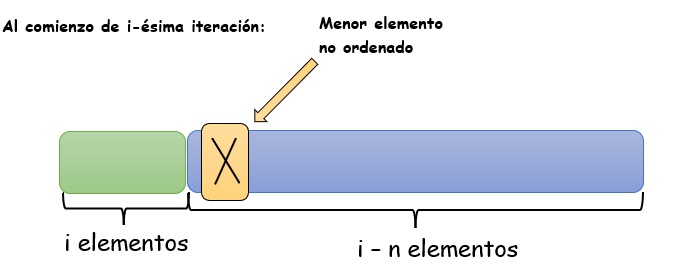

Durante el recorrido del InsertionSort, $x$ se ira intercambio con los elementos anteriores hasta llegar a la posicion correcta ya que los datos anteriores son menores que el.

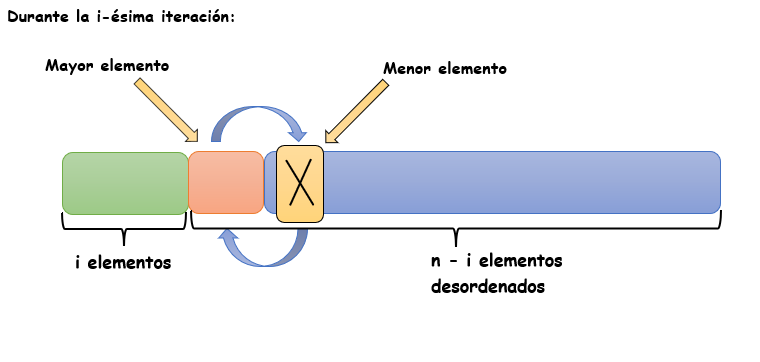

Al finalizar la iteracion (y al comienzo de la siguiente), se seguira cumpliendo la propiedad invariante.

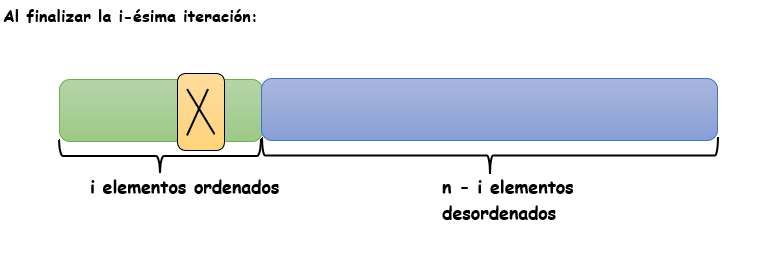

**Correctitud**

Finalmente, como la propiedad del bucle invariante es verdadera al inicio del bucle y se mantiene en cada iteracion, podemos decir que al finalizar la i-esima iteracion el arreglo se encontrara ordenado de menor a mayor y con la misma cantidad de elementos, por lo tanto, cumple con su proposito.

##Prueba del teorema (Función MergeSort)

En inducción matemática para probar una declaración $P(n)$, para todos los números reales $n$ debemos realizar los siguientes pasos.

1.   Probar $P(n)$ con un caso base, por ejemplo $P(1)$.
2.   Probar si $P(m)$ es cierto para $m < n$, por lo tanto para $P(n)$ esto también estará correcto.



# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

Como ejemplo del mejor y peor caso, se pueden observar las demostraciones anteriores, donde $n$ es reemplazado por 5.

### Análisis de resultados

#5.2. Tiempo de ejecucion (experimental)

**Analisis de resultados**